# Kindle based Sentiment analysis

In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [12]:
df =pd.read_csv(r'D:\dataset\Amazon Sentiment Analysis Data set\Kindle Dataset.csv')

In [13]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


**Checking the NUll Values**<br>
**Drop Columns which arent useful**<br>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [19]:
df.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [20]:
df.nunique()

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

In [21]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [22]:
df.drop(labels=['id','didPurchase','userCity','userProvince'],axis=1, inplace=True)

In [23]:
df.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

# Speculate whether ratings are genuine?

**Are all the reviews given by same group of users?**

In [25]:
df.username.value_counts()

Mike         138
Chris         93
John          85
Dave          70
Bill          58
            ... 
Redds          1
Crazy02        1
RonG           1
Ruebaby64      1
yotbum         1
Name: username, Length: 26789, dtype: int64

In [26]:
rating_perperson = df.username.value_counts()

In [29]:
# Ratings

print("Total Ratings:" + str(sum(rating_perperson)))

print("Total Users:" + str(len(rating_perperson)))

print("Users giving bulk ratings (more than 10:" + str(sum(rating_perperson>10)))

bulk = rating_perperson[rating_perperson>10]

bulk_rating = sum(bulk)

print("Bulk Ratings:" + str(bulk_rating))
      
print("Population of bulk ratings :" + str(bulk_rating*100/sum(rating_perperson)))
      
print("Populations of bulk users :" + str(sum(rating_perperson>10)*100/len(rating_perperson)))



Total Ratings:34658
Total Users:26789
Users giving bulk ratings (more than 10:146
Bulk Ratings:3160
Population of bulk ratings :9.117664031392463
Populations of bulk users :0.5449998133562283


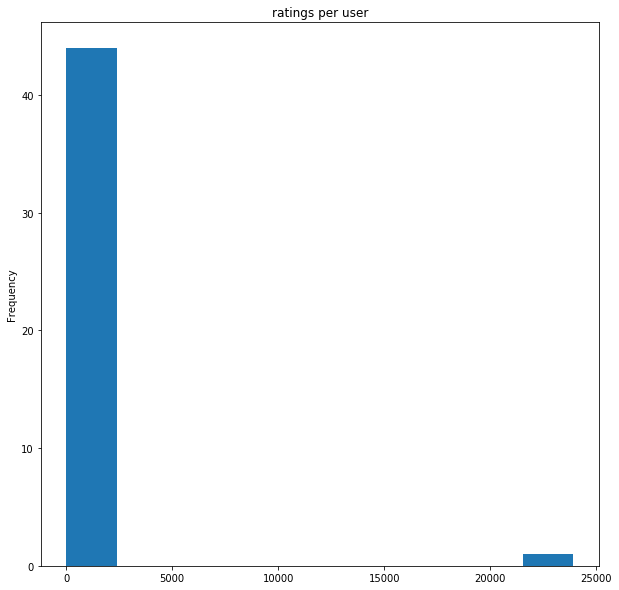

In [32]:
rating_perperson.value_counts().plot(kind = 'hist', figsize=(10,10),title = 'ratings per user')


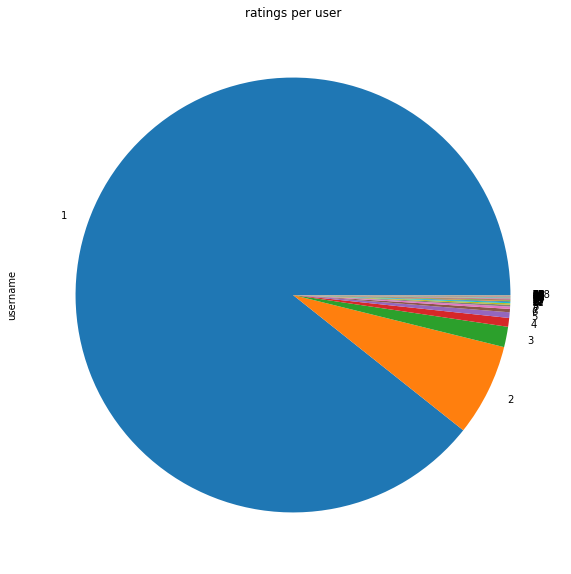

In [33]:
rating_perperson.value_counts().plot(kind = 'pie', figsize=(10,10),title = 'ratings per user')


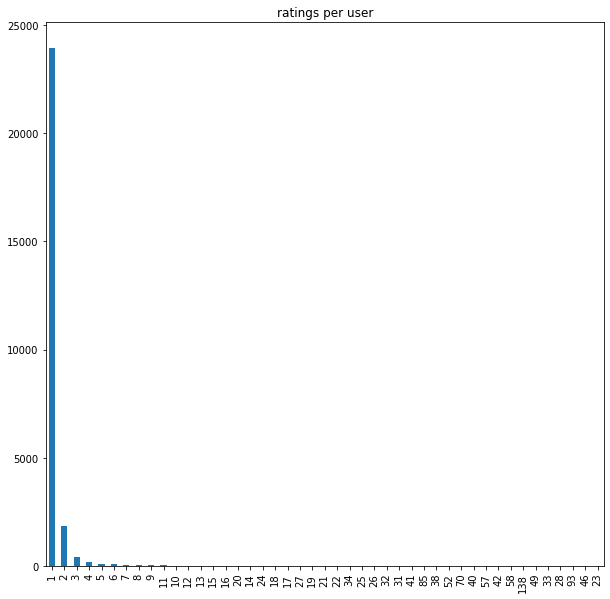

In [35]:
rating_perperson.value_counts().plot(kind = 'bar', figsize=(10,10),title = 'ratings per user')


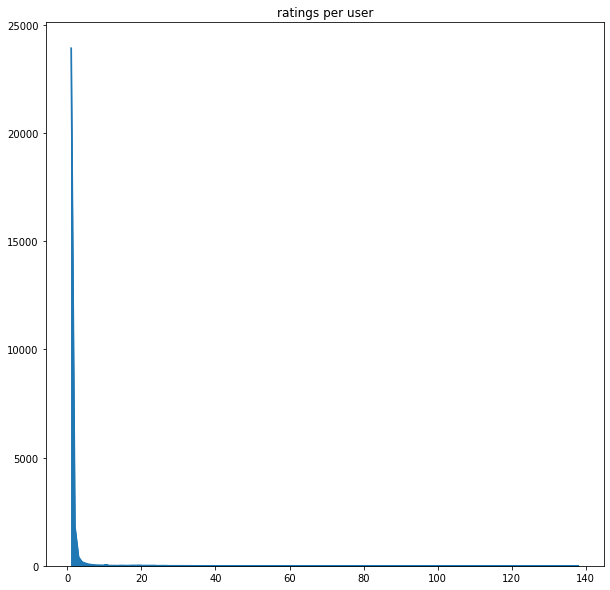

In [36]:
rating_perperson.value_counts().plot(kind = 'area', figsize=(10,10),title = 'ratings per user')


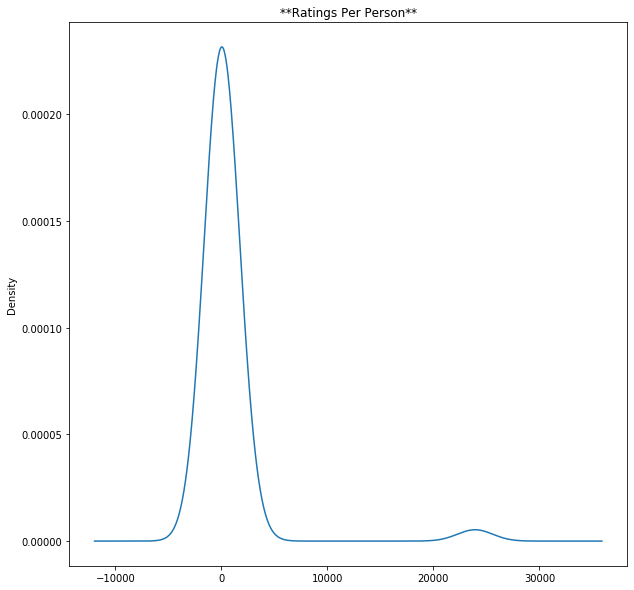

In [38]:
rating_perperson.value_counts().plot(kind = 'kde', figsize=(10,10),title = '**Ratings Per Person**')


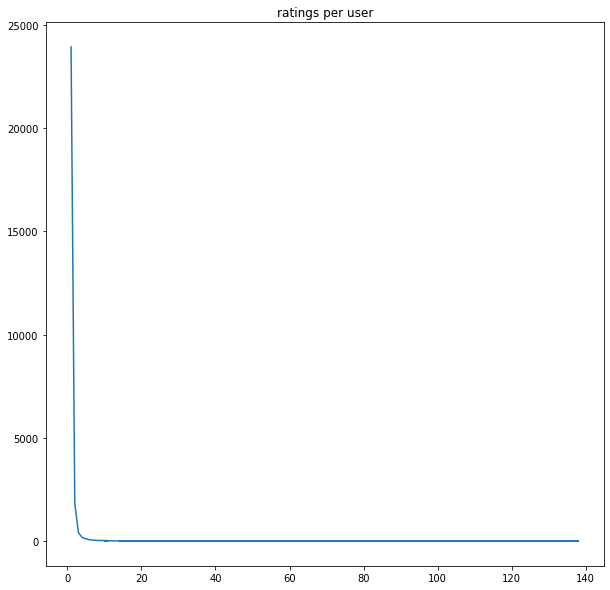

In [39]:
rating_perperson.value_counts().plot(kind = 'line', figsize=(10,10),title = 'ratings per user')


Although the pie chart reveals that most of the users have given single rating but its interesting to note following fact<br>
1 : Only 0.55 % of the users are bulk users<br>
2 : Around 9 % of the ratings have been submitted by just 0.55% users<br>

In [42]:
df['bulk'] = df['username'].apply(lambda x: 1 if x in bulk.index else 0)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

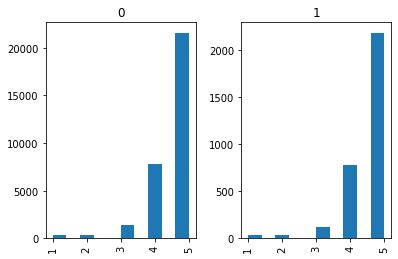

In [44]:
print(df.rating.hist(by = df.bulk))

In [45]:
print(df[df.bulk == 1].rating.describe())
print(df[df.bulk == 0].rating.describe())

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


**Distribution of User Rating**

*** Rating Distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


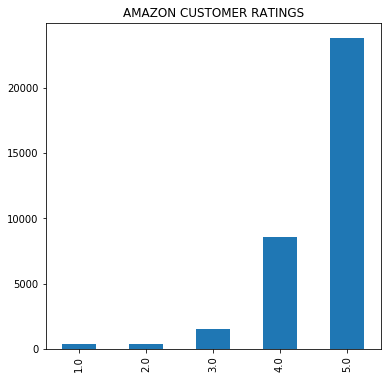

In [47]:
star = df.rating.value_counts()
print('*** Rating Distribution ***')
print(star)

star.sort_index(inplace=True)
star.plot(kind = 'bar', title = 'AMAZON CUSTOMER RATINGS', figsize =(6,6), style = "Solarize_Light2")

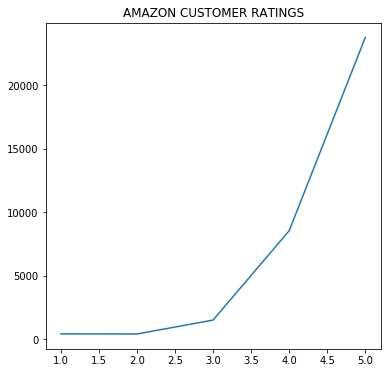

In [51]:
star.plot(kind = 'line', title = 'AMAZON CUSTOMER RATINGS', figsize =(6,6))

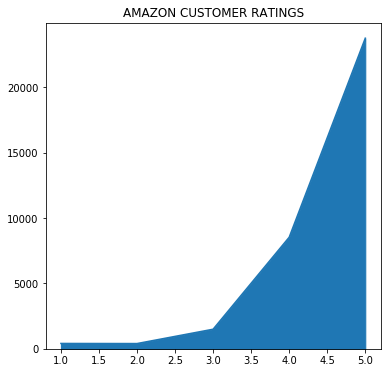

In [54]:
star.plot(kind = 'area', title = 'AMAZON CUSTOMER RATINGS', figsize =(6,6))

# 3. Find the NPS net Promoter score of amazon

**What's NPS Score?**<br>
**How do we calculated for Amazon?**<br>

NPS Score(Net promoter score)<br>

Net Promoters score help us evaluate customer stastification and loyalty<br>

Rating 1,2,3 = Detractors<br>
Rating 4 = Passive<br>
Rating 5 = Promoters<br>

NPS = (promoters - Detractors)/Total ratingsx100<br>

In [56]:
NPS_score = round(100*(star.loc[5]-sum(star.loc[1:3]))/sum(star.loc[:],2))
print('NPS score of Amazon is :' +str(NPS_score))

NPS score of Amazon is :62.0


# Pick a product and deep dive

In [57]:
kindle = df[df.name == 'Amazon Kindle paperwhite -ebook reader - 4GB - 6 monochrome Paperwhite - touchscreen -wifi - black,,,']

In [58]:
kindle.isnull().sum()

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
dateAdded       0
dateSeen        0
doRecommend     0
numHelpful      0
rating          0
sourceURLs      0
text            0
title           0
username        0
bulk            0
dtype: int64

# Paperwhite Kindle- NPS score

In [65]:
kindle.doRecommend.value_counts()

Series([], Name: doRecommend, dtype: int64)

In [ ]:
kindle_s = kindle.rating.value_counts()
kindle_s.sort_index(inplace=True)

kindle_NPS_score = round(100*(kindle_s[5]- sum(kindle_s[1:3]))/sum(kindle_s),2)
print("NPS score of kindle is:" +str(kindle_NPS_score))

kindle_s.plot(kind = "bar",title = 'AMAZON CUSTOMER RATING',figsize = (6,6),style = 'Solarize_Light2')